In [1]:
'''
Author -  Erik Bernhardsson
https://erikbern.com/2018/10/08/the-hackers-guide-to-uncertainty-estimates.html?utm_campaign=Data_Elixir&utm_medium=email&utm_source=Data_Elixir_203
'''

'\nAuthor -  Erik Bernhardsson\nhttps://erikbern.com/2018/10/08/the-hackers-guide-to-uncertainty-estimates.html?utm_campaign=Data_Elixir&utm_medium=email&utm_source=Data_Elixir_203\n'

In [30]:
import datetime , numpy , random ,matplotlib ,seaborn ,pandas
from  matplotlib import pyplot 
matplotlib.style.use('seaborn')
%matplotlib notebook

In [25]:
def generate_time_series(k=200, m=1000, sigma=100, n=50, 
                         start_date=datetime.date(2017, 7, 1)):
    xs = numpy.linspace(0, 1, n, endpoint=False)
    ys = [k*x + m + random.gauss(0, sigma) for x in xs]
    ts = [start_date + datetime.timedelta(x)*365 for x in xs]
    x_scale = numpy.linspace(-1, 2, 500) # for plotting
    t_scale = [start_date + datetime.timedelta(x)*365 for x in x_scale]
    return xs, ys, ts, x_scale, t_scale

xs, ys, ts, x_scale, t_scale = generate_time_series()

<IPython.core.display.Javascript object>


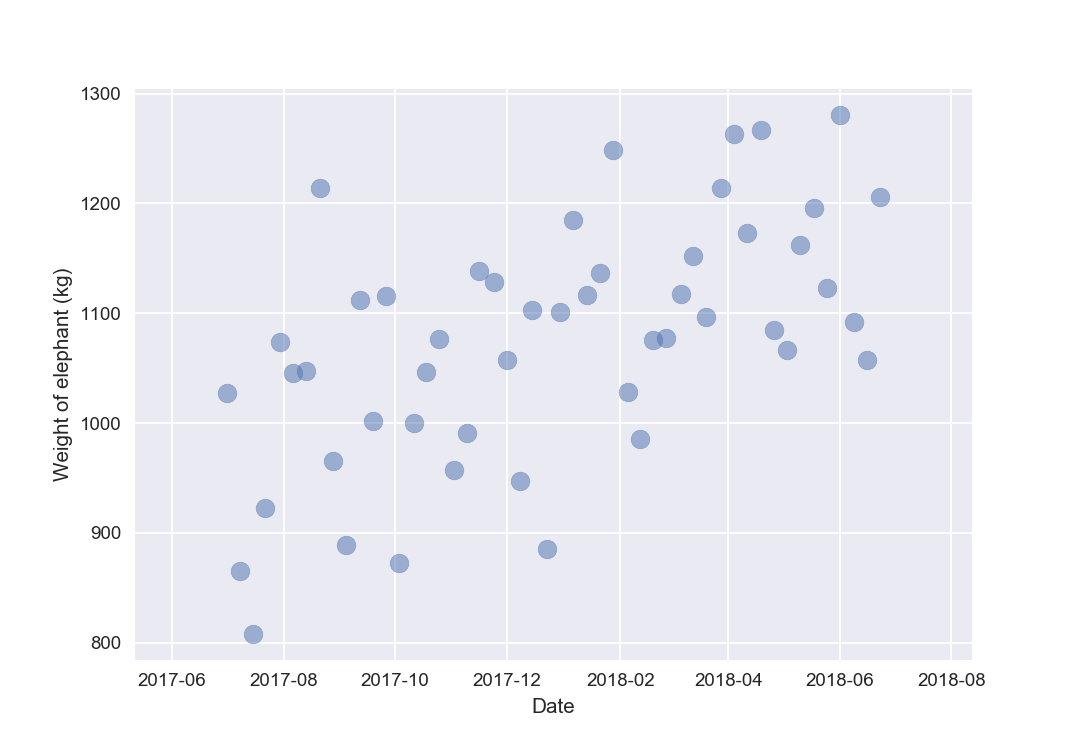

In [27]:
pyplot.scatter(ts, ys, alpha=0.5, s=100)
pyplot.xlabel('Date')
pyplot.ylabel('Weight of elephant (kg)');

<IPython.core.display.Javascript object>


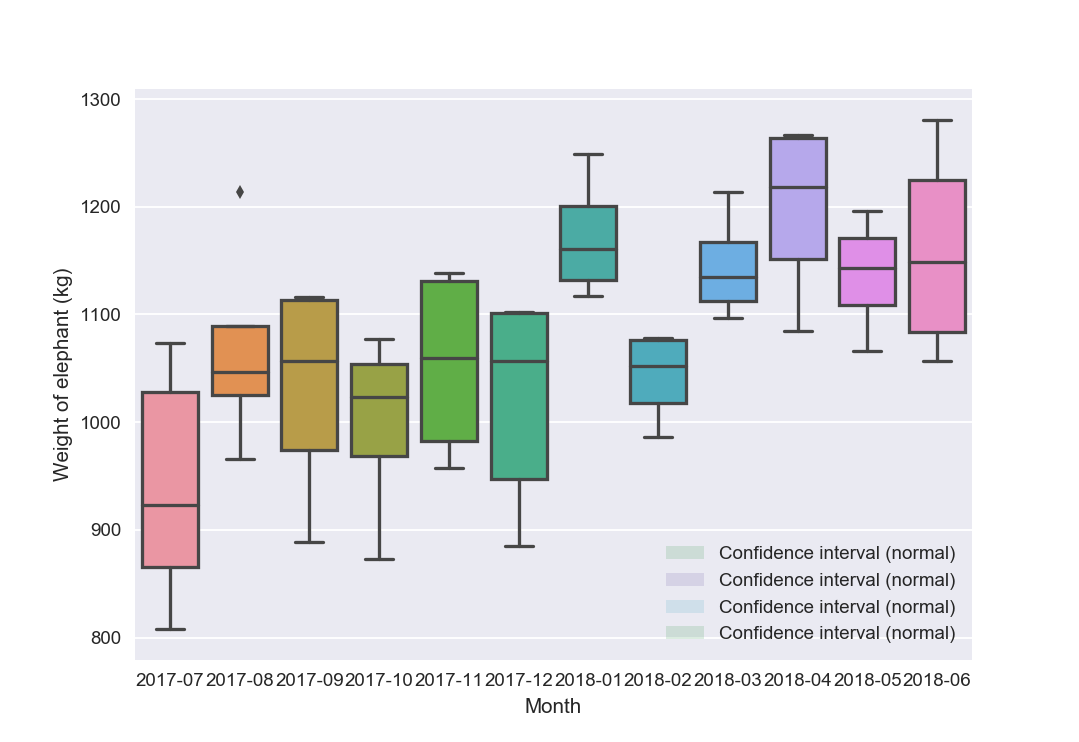

In [31]:
d = pandas.DataFrame({'x': xs, 't': ts, 'Weight (kg)': ys})
d['Month'] = d['t'].apply(lambda t: t.strftime('%Y-%m'))
seaborn.boxplot(data=d, x='Month', y='Weight (kg)')

In [35]:
def plot_confidence_interval(observations_by_group):
    groups = list(sorted(observations_by_group.keys()))
    lo_bound = []
    hi_bound = []
    for group in groups:
        series = observations_by_group[group]
        mu, std, n = numpy.mean(series), numpy.std(series), len(series)
        lo_bound.append(mu - 1.96*std*n**-0.5)
        hi_bound.append(mu + 1.96*std*n**-0.5)
    pyplot.fill_between(groups, lo_bound, hi_bound, alpha=0.2,
                        label='Confidence interval (normal)')
    

pyplot.scatter(ts, ys, alpha=0.5, s=100)
observations_by_month = {}
for month, y in zip(d['Month'], d['Weight (kg)']):
    observations_by_month.setdefault(month, []).append(y)
plot_confidence_interval(observations_by_month)
pyplot.ylabel('Weight of elephant (kg)')
pyplot.legend()
